# ECOG

3 channel recording (2 and stimulation), sample rate 2kHz, 200 sweeps 3s duration. 40 hz stimulation for 1 s.

In [1]:
import pyabf
import mne
import matplotlib.pyplot as plt
import numpy as np
plt.ion()

In [2]:
abf = pyabf.ABF('../Data/2021_01_29_0007.abf')
print(abf)

ABF (version 2.5.0.0) with 3 channels (V, uV, uV), sampled at 2.0 kHz, containing 200 sweeps, having no tags, with a total length of 10.05 minutes, recorded with protocol "test_train_EEG".


In [3]:
n_channels = 3
sampling_rate = abf.dataRate
channel_names = ['F1', 'F2', 'STI']
channel_types = ['eeg', 'eeg', 'stim']
info = mne.create_info(ch_names=channel_names,
                       sfreq=sampling_rate, ch_types=channel_types)
events = [[x, 0, x+1] for x in range(200)]
tmin = 0

In [4]:
#  data: epochs, channels, time
data = np.empty([np.size(abf.sweepList), 3, np.size(abf.sweepX)])
for isweep in abf.sweepList:
    abf.setSweep(isweep, channel=1)
    data[isweep, 0, :] = abf.sweepY
    abf.setSweep(isweep, channel=2)
    data[isweep, 1, :] = abf.sweepY
    abf.setSweep(isweep, channel=0)
    data[isweep, 2, :] = abf.sweepY

Not setting metadata
Not setting metadata
200 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


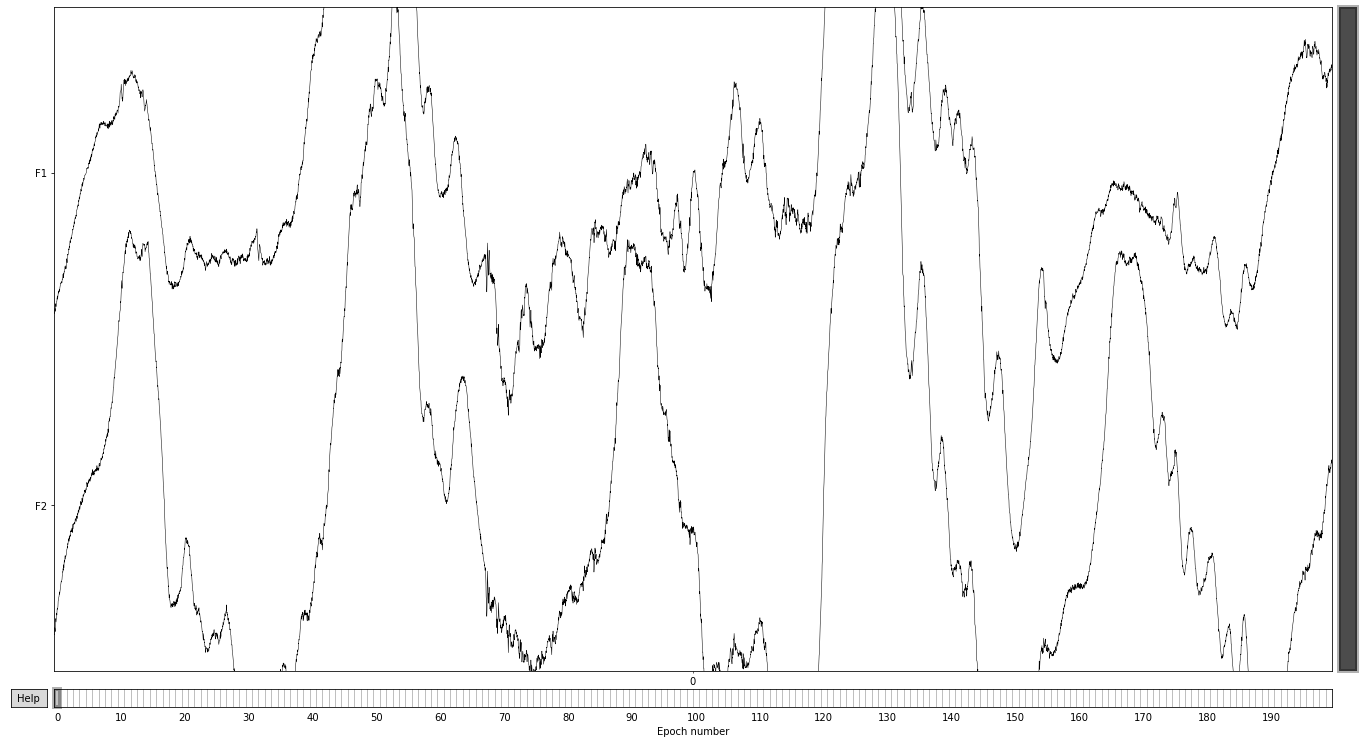

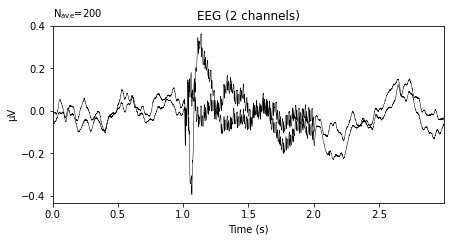

In [5]:
abf_epochs = mne.EpochsArray(data*1e-6, info, events, tmin)
abf_epochs.set_montage('standard_1020')
abf_epochs.plot(scalings='auto', n_epochs=1);
abf_epochs.average().plot();

    Using multitaper spectrum estimation with 7 DPSS windows


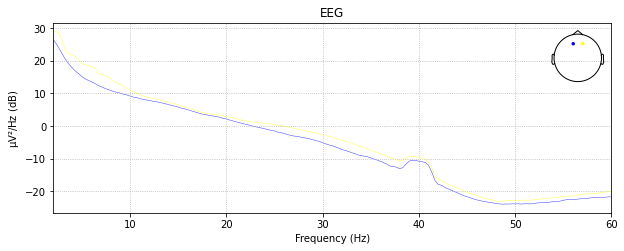

In [6]:
abf_epochs.copy().plot_psd(fmin=2, fmax=60);

No baseline correction applied


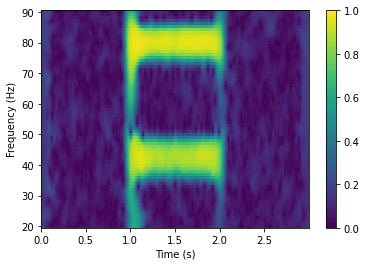

In [7]:
freqs = np.linspace(20, 90, 71)
n_cycles = np.logspace(*np.log10([7, 30]), 71)
power, itc = mne.time_frequency.tfr_morlet(
    abf_epochs, freqs=freqs, n_cycles=n_cycles, use_fft=True, return_itc=True,  n_jobs=1)
itc.plot(title='', vmin=0., vmax=1., cmap='viridis');

In [8]:
abf_epochs.save('../Data/tets_epo.fif',overwrite=True)

Overwriting existing file.


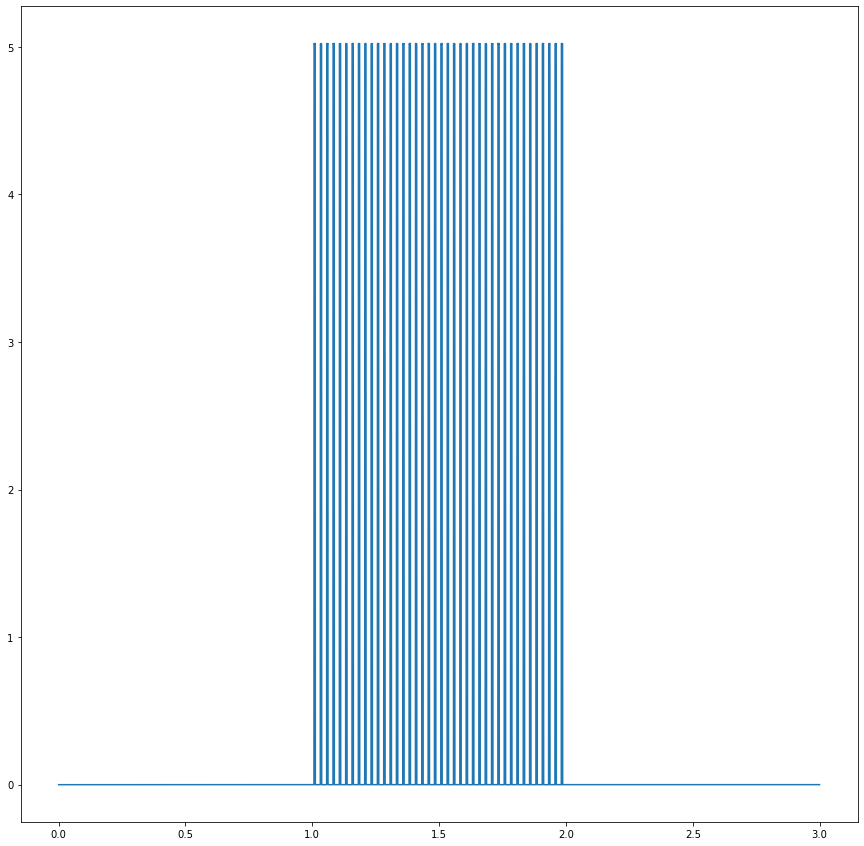

In [9]:
abf.setSweep(1, channel=0)
plt.figure(figsize=(15,15))
plt.plot(abf.sweepX, abf.sweepY);